<a href="https://colab.research.google.com/github/ssinghaditi/dsci351project/blob/main/DSCI_351_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dataframe
Show the dataframe with columns that we are going to explore filtered only by the year 2015. 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sqlite3
import pandas as pd
import pandasql as ps
from pandasql import sqldf
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [7]:
database = ("/content/drive/MyDrive/Colab Notebooks/database.sqlite")
conn = sqlite3.connect(database)

df = pd.read_sql("""SELECT BusinessYear, StateCode, Tobacco, Age, IndividualRate, IndividualTobaccoRate, Couple, PrimarySubscriberAndOneDependent, PrimarySubscriberAndTwoDependents, PrimarySubscriberAndThreeOrMoreDependents, CoupleAndOneDependent, CoupleAndTwoDependents, CoupleAndThreeOrMoreDependents FROM Rate WHERE BusinessYear == "2015";""", conn)
df

,BusinessYear,StateCode,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2015,AK,No Preference,0-20,43.00,,,,,,,,
1,2015,AK,No Preference,21,38.00,,,,,,,,
2,2015,AK,No Preference,22,38.00,,,,,,,,
3,2015,AK,No Preference,23,38.00,,,,,,,,
4,2015,AK,No Preference,24,38.00,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676087,2015,WV,No Preference,61,13.95,,,,,,,,
4676088,2015,WV,No Preference,62,13.95,,,,,,,,
4676089,2015,WV,No Preference,63,13.95,,,,,,,,
4676090,2015,WV,No Preference,64,13.95,,,,,,,,


## Individual vs Family Tier
- Decided to narrow down to family tier due to long processing time

In [8]:
indiv = """SELECT StateCode, Tobacco, Age, IndividualRate, IndividualTobaccoRate FROM df WHERE Age != "Family Option";"""
indiv_df = ps.sqldf(indiv, locals())

fam = """SELECT StateCode, Tobacco, Age, IndividualRate, IndividualTobaccoRate, Couple, PrimarySubscriberAndOneDependent, PrimarySubscriberAndTwoDependents, PrimarySubscriberAndThreeOrMoreDependents, CoupleAndOneDependent, CoupleAndTwoDependents, CoupleAndThreeOrMoreDependents FROM df WHERE Age == "Family Option";"""
fam_df = ps.sqldf(fam, locals())

def view(x=''): 
    if x=='Individual':
        print(indiv_df.shape)
        display(indiv_df)
    else:
        print(fam_df.shape)
        display(fam_df)
 
b_select =  widgets.RadioButtons(
    options=['Individual', 'Family-Tier'],
    description='Tier option:',
    disabled=False
)
widgets.interactive(view,x=b_select)


interactive(children=(RadioButtons(description='Tier option:', options=('Individual', 'Family-Tier'), value='I…

In [9]:
df = fam_df

## Cleaning
- Check NA columns - no NA values; generally clean dataset

In [10]:
df.isnull().values.any()
df.isnull().sum()

StateCode                                    0
Tobacco                                      0
Age                                          0
IndividualRate                               0
IndividualTobaccoRate                        0
Couple                                       0
PrimarySubscriberAndOneDependent             0
PrimarySubscriberAndTwoDependents            0
PrimarySubscriberAndThreeOrMoreDependents    0
CoupleAndOneDependent                        0
CoupleAndTwoDependents                       0
CoupleAndThreeOrMoreDependents               0
dtype: int64

## Explore the dataset:

- Tobacco Use
- StateCode
- Individual Rate
- StateCode & Individual Rate

#### Tobacco Use

In [15]:
import sqlalchemy
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)
df.to_sql('df', index=False, con=engine)

def view2(x=''):
    if x=='Tobacco Preference': 
        tobacco = pd.read_sql("""SELECT * FROM df WHERE Tobacco != "No Preference";""", engine)
        print(tobacco.shape)
        display(tobacco)
    else:
        non_tobacco = pd.read_sql("""SELECT * FROM df WHERE Tobacco == "No Preference";""", engine)
        print(non_tobacco.shape)
        display(non_tobacco)
 
b_select =  widgets.RadioButtons(
    options=['Tobacco Preference', 'No Tobacco Preference' ],
    description='Tier option:',
    disabled=False
)
widgets.interactive(view2,x=b_select)

interactive(children=(RadioButtons(description='Tier option:', options=('Tobacco Preference', 'No Tobacco Pref…

No values for Tobacco preference for family tier - Drop columns Tobacco & IndividualTobaccoRate

In [16]:
pd.set_option('display.max_rows', 100)
n_df = pd.read_sql("""SELECT StateCode, Age, IndividualRate, Couple, PrimarySubscriberAndOneDependent, PrimarySubscriberAndTwoDependents, PrimarySubscriberAndThreeOrMoreDependents, CoupleAndOneDependent, CoupleAndTwoDependents, CoupleAndThreeOrMoreDependents FROM df;""", engine)
print(n_df.shape)
display(n_df)
engine = create_engine('sqlite://', echo=False)
n_df.to_sql('n_df', index=False, con=engine)

(15586, 10)


,StateCode,Age,IndividualRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,AK,Family Option,52.06,104.12,105.15,158.24,224.6,157.21,210.3,276.66
1,AK,Family Option,52.06,104.12,105.15,158.24,224.6,157.21,210.3,276.66
2,AK,Family Option,52.06,104.12,105.15,158.24,224.6,157.21,210.3,276.66
3,AK,Family Option,39.92,79.84,79.18,118.44,167.52,119.1,158.36,207.44
4,AK,Family Option,39.92,79.84,79.18,118.44,167.52,119.1,158.36,207.44
...,...,...,...,...,...,...,...,...,...,...
15581,WV,Family Option,28.59,57.18,57.74,86.88,123.32,86.32,115.47,151.91
15582,WV,Family Option,28.59,57.18,57.74,86.88,123.32,86.32,115.47,151.91
15583,WV,Family Option,28.59,57.18,57.74,86.88,123.32,86.32,115.47,151.91
15584,WV,Family Option,28.59,57.18,57.74,86.88,123.32,86.32,115.47,151.91


#### StateCode

interactive(children=(Select(description='State:', options=('All', 'AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', '…

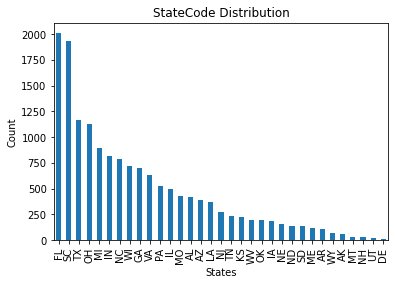

In [17]:
n_df['StateCode'].value_counts().plot(kind='bar', title="StateCode Distribution").set(xlabel='States', ylabel="Count")

items = ['All']+sorted(n_df['StateCode'].unique().tolist())
def view2(x=''):
    if x=='All': 
        print(n_df.shape)
        display(n_df)
    else:
        engine = create_engine('sqlite://', echo=False)
        n_df.to_sql('n_df', index=False, con=engine)
        state = pd.read_sql("""SELECT * FROM n_df WHERE StateCode == '""" + str(x) +"""';""", engine)
        print(state.shape)
        display(state)
 
b_select =  widgets.Select(options=items, description='State:')
widgets.interactive(view2,x=b_select)

#### Individual Rate

interactive(children=(IntRangeSlider(value=(13, 41), continuous_update=False, description='Individual Rate:', …

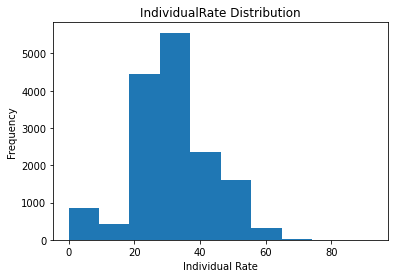

In [18]:
n_df['IndividualRate'].plot(kind='hist', title="IndividualRate Distribution").set(xlabel='Individual Rate', ylabel="Frequency")

engine = create_engine('sqlite://', echo=False)
n_df.to_sql('n_df', index=False, con=engine)

def view2(x=''):
    min = x[0]
    max = x[1]
    query = """SELECT * FROM n_df WHERE IndividualRate >= :min AND IndividualRate <= :max;"""
    indiv_rate = pd.read_sql(query, params={'min': min, 'max': max}, con=engine)
    print(indiv_rate.shape)
    display(indiv_rate)
        
b_select = widgets.IntRangeSlider(min=0, max=55, step=1, description='Individual Rate:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='d')
widgets.interactive(view2,x=b_select)

#### StateCode & Individual Rate

In [19]:
engine = create_engine('sqlite://', echo=False)
n_df.to_sql('n_df', index=False, con=engine)

items = ['All']+sorted(n_df['StateCode'].unique().tolist())
def view(x='', y=''):
    min = y[0]
    max = y[1]
    if x=='All': 
        pd.set_option('display.max_rows', None)
        query = """SELECT * FROM n_df WHERE IndividualRate >= :min AND IndividualRate <= :max;"""
        indiv_rate = pd.read_sql(query, params={'min': min, 'max': max}, con=engine)
        print(indiv_rate.shape)
        indiv_rate['IndividualRate'].plot(kind='hist', title="IndividualRate Distribution").set(xlabel='Individual Rate', ylabel="Frequency")
        display(indiv_rate.head())
    else:
        state = pd.read_sql("""SELECT * FROM n_df WHERE StateCode == '""" + str(x) +"""';""", engine)
        engine2 = create_engine('sqlite://', echo=False)
        state.to_sql('state', index=False, con=engine2)
        query2 = """SELECT * FROM state WHERE IndividualRate >= :min AND IndividualRate <= :max;"""
        indiv_rate2 = pd.read_sql(query2, params={'min': min, 'max': max}, con=engine2)
        print(indiv_rate2.shape)
        indiv_rate2['IndividualRate'].plot(kind='hist', title="IndividualRate Distribution by specific State").set(xlabel='Individual Rate for State', ylabel="Frequency")
        display(indiv_rate2.head())
 
a_select =  widgets.Select(options=items, description='State:')
b_select = widgets.IntRangeSlider(min=0, max=55, step=1, description='Individual Rate:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='d')
widgets.interactive(view,x=a_select, y=b_select)

interactive(children=(Select(description='State:', options=('All', 'AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', '…

## Search the dataset:
- By state
- By dependents

#### State

In [21]:
pd.reset_option("display.max_rows")

def searchFxn(x=''):
    state = pd.read_sql("""SELECT * FROM n_df WHERE StateCode == '""" + str(x) +"""';""", engine)
    print(state.shape)
    display(state)

b_select = widgets.Text(description='State:')
widgets.interactive(searchFxn,x=b_select)

interactive(children=(Text(value='', description='State:'), Output()), _dom_classes=('widget-interact',))

#### Dependents

In [22]:
def searchFxn(x='', y='', z=''):
    if x=='Individual':
        if y=='1':
            dep = pd.read_sql("""SELECT StateCode, Age, IndividualRate, PrimarySubscriberAndOneDependent FROM n_df LIMIT :lim;""", params={'lim': z}, con=engine)
            print(dep.shape)
            display(dep)
        elif y=='2':
            dep = pd.read_sql("""SELECT StateCode, Age, IndividualRate, PrimarySubscriberAndTwoDependents FROM n_df LIMIT :lim;""", params={'lim': z}, con=engine)
            print(dep.shape)
            display(dep)
        else:
            dep = pd.read_sql("""SELECT StateCode, Age, IndividualRate, PrimarySubscriberAndThreeOrMoreDependents FROM n_df LIMIT :lim;""", params={'lim': z}, con=engine)
            print(dep.shape)
            display(dep)
    else:
        if y=='1':
            dep = pd.read_sql("""SELECT StateCode, Age, Couple, CoupleAndOneDependent FROM n_df LIMIT :lim;""", params={'lim': z}, con=engine)
            print(dep.shape)
            display(dep)
        elif y=='2':
            dep = pd.read_sql("""SELECT StateCode, Age, Couple, CoupleAndTwoDependents FROM n_df LIMIT :lim;""", params={'lim': z}, con=engine)
            print(dep.shape)
            display(dep)
        else:
            dep = pd.read_sql("""SELECT StateCode, Age, Couple, CoupleAndThreeOrMoreDependents FROM n_df LIMIT :lim;""", params={'lim': z}, con=engine)
            print(dep.shape)
            display(dep)

a_select = widgets.Dropdown(
    options=['Individual', 'Couple'],
    description='Plan option:',
    disabled=False,
)
b_select = widgets.Text(description='Dependents (Enter a number):', style={'description_width': 'initial'})
c_select = widgets.BoundedIntText(min=0,max=15586,step=1,description='Num. of observations:',style={'description_width': 'initial'}, disabled=False)
widgets.interactive(searchFxn,x=a_select, y=b_select, z=c_select)

interactive(children=(Dropdown(description='Plan option:', options=('Individual', 'Couple'), value='Individual…

## Basic Statistics:

#### Average Individual Rates By State

Average Individual Rates By State


,AvgIndividualRate
StateCode,
AK,49.090741
AL,28.992933
AR,27.430625
AZ,32.133673
DE,53.076250
FL,21.513224
GA,30.449886
IA,28.716484
IL,40.621336


[Text(0, 0.5, 'Average Rate')]

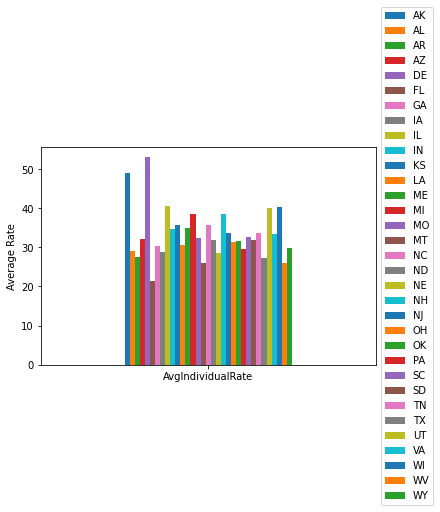

In [23]:
print("Average Individual Rates By State")
df1 = pd.read_sql("""SELECT StateCode, AVG(IndividualRate) AS AvgIndividualRate FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df1)
df1_viz = df1.T
viz = df1_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Couple Rate By State

Average Couple Rate By State


,AvgCoupleRate
StateCode,
AK,61.360926
AL,44.175649
AR,38.702500
AZ,53.704439
DE,47.137500
FL,35.733199
GA,47.525114
IA,48.850714
IL,80.790992


[Text(0, 0.5, 'Average Rate')]

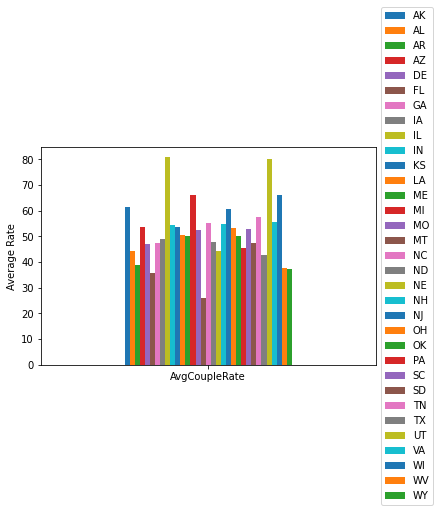

In [24]:
print("Average Couple Rate By State")
df3 = pd.read_sql("""SELECT StateCode, AVG(Couple) AS AvgCoupleRate FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df3)
df3_viz = df3.T
viz = df3_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Primary Subscriber And One Dependent Rate By State

Average Primary Subscriber And One Dependent Rate By State


,AvgPrimarySubscriberAndOneDependent
StateCode,
AK,67.905000
AL,43.511106
AR,38.897500
AZ,53.692066
DE,53.078750
FL,39.132438
GA,48.419659
IA,51.124615
IL,80.015263


[Text(0, 0.5, 'Average Rate')]

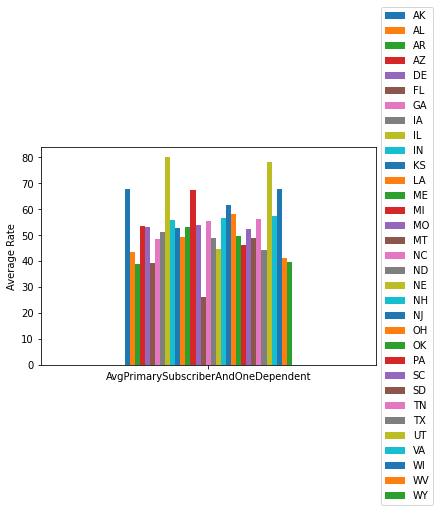

In [25]:
print("Average Primary Subscriber And One Dependent Rate By State")
df4 = pd.read_sql("""SELECT StateCode, AVG(PrimarySubscriberAndOneDependent) AS AvgPrimarySubscriberAndOneDependent FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df4)
df4_viz = df4.T
viz = df4_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Primary Subscriber And Two Dependents Rate By State

Average Primary Subscriber And Two Dependents Rate By State


,AvgPrimarySubscriberAndTwoDependents
StateCode,
AK,92.830370
AL,61.858990
AR,58.446875
AZ,78.519898
DE,82.586250
FL,53.988781
GA,70.702599
IA,77.216593
IL,118.152490


[Text(0, 0.5, 'Average Rate')]

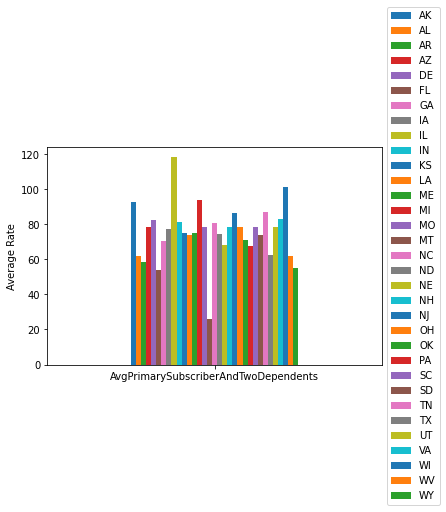

In [26]:
print("Average Primary Subscriber And Two Dependents Rate By State")
df5 = pd.read_sql("""SELECT StateCode, AVG(PrimarySubscriberAndTwoDependents) AS AvgPrimarySubscriberAndTwoDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df5)
df5_viz = df5.T
viz = df5_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Primary Subscriber And Three Or More Dependents Rate By State

Average Primary Subscriber And Three Or More Dependents Rate By State


,AvgPrimarySubscriberAndThreeOrMoreDependents
StateCode,
AK,114.721481
AL,81.689687
AR,80.860625
AZ,94.719490
DE,112.096250
FL,69.646493
GA,88.745781
IA,84.663132
IL,151.323785


[Text(0, 0.5, 'Average Rate')]

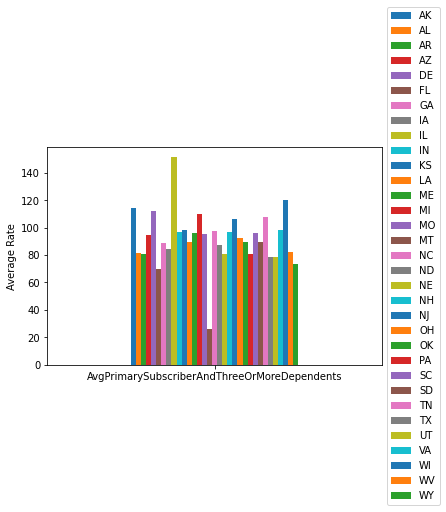

In [27]:
print("Average Primary Subscriber And Three Or More Dependents Rate By State")
df6 = pd.read_sql("""SELECT StateCode, AVG(PrimarySubscriberAndThreeOrMoreDependents) AS AvgPrimarySubscriberAndThreeOrMoreDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df6)
df6_viz = df6.T
viz = df6_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Couple And One Dependent Rate By State

Average Couple And One Dependent Rate By State


,AvgCoupleAndOneDependent
StateCode,
AK,90.667593
AL,62.522260
AR,58.248750
AZ,81.397194
DE,76.647500
FL,53.781358
GA,70.906250
IA,76.812747
IL,122.152126


[Text(0, 0.5, 'Average Rate')]

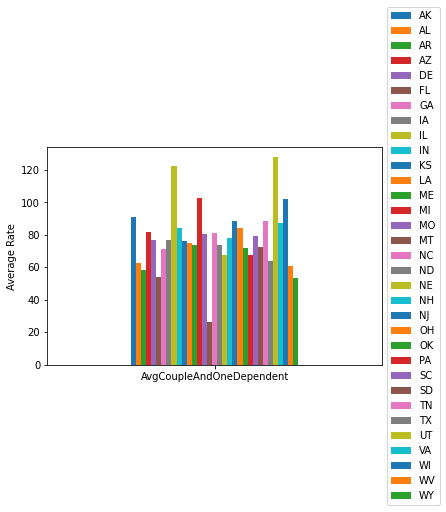

In [28]:
print("Average Couple And One Dependent Rate By State")
df7 = pd.read_sql("""SELECT StateCode, AVG(CoupleAndOneDependent) AS AvgCoupleAndOneDependent FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df7)
df7_viz = df7.T
viz = df7_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Couple And Two Dependents Rate By State

Average Couple And Two Dependents Rate By State


,AvgCoupleAndTwoDependents
StateCode,
AK,110.065926
AL,80.869832
AR,77.798125
AZ,96.188520
DE,106.157500
FL,66.294070
GA,87.253736
IA,82.770055
IL,153.867146


[Text(0, 0.5, 'Average Rate')]

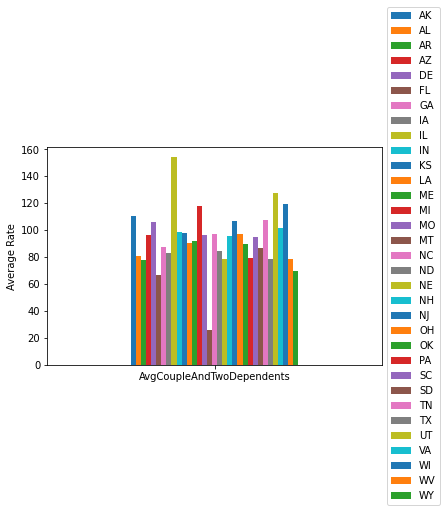

In [29]:
print("Average Couple And Two Dependents Rate By State")
df8 = pd.read_sql("""SELECT StateCode, AVG(CoupleAndTwoDependents) AS AvgCoupleAndTwoDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df8)
df8_viz = df8.T
viz = df8_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

#### Average Couple And Three Or More Dependents Rate By State

Average Couple And Three Or More Dependents Rate By State


,AvgCoupleAndThreeOrMoreDependents
StateCode,
AK,131.957037
AL,100.700841
AR,100.212500
AZ,112.387602
DE,135.666250
FL,82.429353
GA,105.296463
IA,90.216593
IL,187.038522


[Text(0, 0.5, 'Average Rate')]

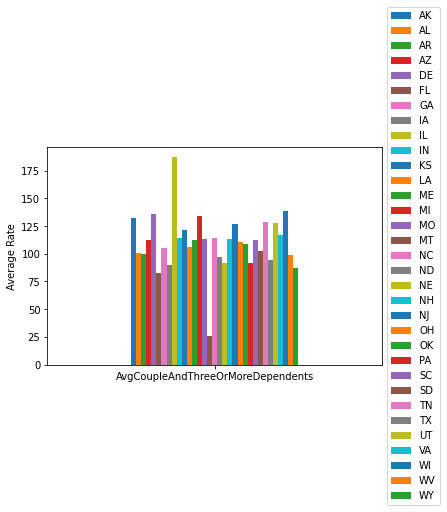

In [30]:
print("Average Couple And Three Or More Dependents Rate By State")
df9 = pd.read_sql("""SELECT StateCode, AVG(CoupleAndThreeOrMoreDependents) AS AvgCoupleAndThreeOrMoreDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
display(df9)
df9_viz = df9.T
viz = df9_viz.plot.bar(rot=0)
viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
viz.set(ylabel = "Average Rate")

### Visualization of the averages by State

In [31]:
items = ['All']+sorted(n_df['StateCode'].unique().tolist())

def view2(x=''):
    if x=='All':
        viz_df = pd.read_sql("""SELECT StateCode, AVG(IndividualRate) AS AvgIndividualRate, AVG(Couple) AS AvgCoupleRate, AVG(PrimarySubscriberAndOneDependent) AS AvgPrimarySubscriberAndOneDependent, AVG(PrimarySubscriberAndTwoDependents) AS AvgPrimarySubscriberAndTwoDependents, AVG(PrimarySubscriberAndThreeOrMoreDependents) AS AvgPrimarySubscriberAndThreeOrMoreDependents, AVG(CoupleAndOneDependent) AS AvgCoupleAndOneDependent, AVG(CoupleAndTwoDependents) AS AvgCoupleAndTwoDependents, AVG(CoupleAndThreeOrMoreDependents) AS AvgCoupleAndThreeOrMoreDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode;""", conn, index_col = ['StateCode'])
        viz_df = viz_df.T
        display(viz_df)
        viz = viz_df.plot.bar()
        viz.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        viz.set(xlabel='Rate Type', ylabel="Average Rate")
    else:
        viz_df = pd.read_sql("""SELECT StateCode, AVG(IndividualRate) AS AvgIndividualRate, AVG(Couple) AS AvgCoupleRate, AVG(PrimarySubscriberAndOneDependent) AS AvgPrimarySubscriberAndOneDependent, AVG(PrimarySubscriberAndTwoDependents) AS AvgPrimarySubscriberAndTwoDependents, AVG(PrimarySubscriberAndThreeOrMoreDependents) AS AvgPrimarySubscriberAndThreeOrMoreDependents, AVG(CoupleAndOneDependent) AS AvgCoupleAndOneDependent, AVG(CoupleAndTwoDependents) AS AvgCoupleAndTwoDependents, AVG(CoupleAndThreeOrMoreDependents) AS AvgCoupleAndThreeOrMoreDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" AND StateCode == '""" + str(x) + """';""", conn, index_col = ['StateCode'])
        viz_df = viz_df.T
        display(viz_df)
        viz_df[x].plot(kind='bar', title="Averages of Rate type by State").set(xlabel='Rate Type', ylabel="Average Rate")
 
b_select =  widgets.Select(options=items, description='State:')
widgets.interactive(view2,x=b_select)

interactive(children=(Select(description='State:', options=('All', 'AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', '…

### Compare average rates between 2 states

In [32]:
items = sorted(n_df['StateCode'].unique().tolist())

def view2(x='', y=''):
    viz_df = pd.read_sql("""SELECT * FROM (SELECT StateCode, AVG(IndividualRate) AS AvgIndividualRate, AVG(Couple) AS AvgCoupleRate, AVG(PrimarySubscriberAndOneDependent) AS AvgPrimarySubscriberAndOneDependent, AVG(PrimarySubscriberAndTwoDependents) AS AvgPrimarySubscriberAndTwoDependents, AVG(PrimarySubscriberAndThreeOrMoreDependents) AS AvgPrimarySubscriberAndThreeOrMoreDependents, AVG(CoupleAndOneDependent) AS AvgCoupleAndOneDependent, AVG(CoupleAndTwoDependents) AS AvgCoupleAndTwoDependents, AVG(CoupleAndThreeOrMoreDependents) AS AvgCoupleAndThreeOrMoreDependents FROM Rate WHERE BusinessYear == "2015" AND AGE == "Family Option" GROUP BY StateCode) WHERE StateCode in (:one, :two);""", params={'one': x, 'two': y}, con=conn, index_col = ['StateCode'])
    viz_df = viz_df.T
    display(viz_df)
    viz = viz_df.plot.bar()
    viz.set(title="Averages of Rate between State A & State B", xlabel='Rate Type', ylabel="Average Rate")

a_select = widgets.Select(options=items, description='State A:')
b_select = widgets.Select(options=items, description='State B:')
widgets.interactive(view2,x=a_select, y=b_select)

interactive(children=(Select(description='State A:', options=('AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'IA', …